In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline


In [2]:
df=pd.read_csv(r"C:\Users\KIIT\Desktop\ML\internshala vids ML\Chennai house prediction\train.csv")

In [3]:
df.shape

(7109, 22)

In [4]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


# DATA EXPLORATION

# DESCRIBE FUNCTION


In [5]:
df.describe()

# ->the describe function works for continous variables
# ->we can identify the number of missing value from the 'count' given
# ->comparing the 75% and the max value , determine presence of outliers

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [6]:
df.describe(include="all")

# ->count can be used to find out missing values 
# -> gives unique value for categorical variable 
# -> here categorical variables are area and part_id

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109,7109,7109.000000,7109,7109.000000,7108.000000,7104.000000,7109.000000,7109,7109,...,7109,7109,7109,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
unique,7109,17,NaN,2798,NaN,NaN,NaN,NaN,9,3,...,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,P02101,Chrompet,NaN,06-10-2009,NaN,NaN,NaN,NaN,AdjLand,Yes,...,AllPub,Paved,RL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1681,NaN,12,NaN,NaN,NaN,NaN,1433,3587,...,1886,2560,1858,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1382.073006,NaN,99.603179,1.637029,1.213260,3.688704,NaN,NaN,...,NaN,NaN,NaN,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,NaN,NaN,457.410902,NaN,57.403110,0.802902,0.409639,1.019099,NaN,NaN,...,NaN,NaN,NaN,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,NaN,NaN,500.000000,NaN,0.000000,1.000000,1.000000,2.000000,NaN,NaN,...,NaN,NaN,NaN,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,NaN,NaN,993.000000,NaN,50.000000,1.000000,1.000000,3.000000,NaN,NaN,...,NaN,NaN,NaN,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,NaN,NaN,1373.000000,NaN,99.000000,1.000000,1.000000,4.000000,NaN,NaN,...,NaN,NaN,NaN,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,NaN,NaN,1744.000000,NaN,148.000000,2.000000,1.000000,4.000000,NaN,NaN,...,NaN,NaN,NaN,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07


In [7]:
# -> instead of looking into summery of describe for missing value its better to find out missing valyue by using the function 'isnull()'

df.isnull()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7105,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7106,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7107,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [9]:
df.dtypes

# ->object represents categorical variables 
# -> int64/float64 shows  continous variables  

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [10]:
# ->now we are summerizing the description of the data set

temp=pd.DataFrame(index=df.columns)
temp['data_type']=df.dtypes
temp['null_count']=df.isnull().sum()
temp['unique_count']=df.nunique()
temp

,data_type,null_count,unique_count
PRT_ID,object,0,7109
AREA,object,0,17
INT_SQFT,int64,0,1699
DATE_SALE,object,0,2798
DIST_MAINROAD,int64,0,201
N_BEDROOM,float64,1,4
N_BATHROOM,float64,5,2
N_ROOM,int64,0,5
SALE_COND,object,0,9
PARK_FACIL,object,0,3


In [11]:
df['N_BEDROOM']

0       1.0
1       2.0
2       1.0
3       3.0
4       1.0
       ... 
7104    1.0
7105    3.0
7106    2.0
7107    1.0
7108    3.0
Name: N_BEDROOM, Length: 7109, dtype: float64

# Univatriate Analysis

##### Histogram

Text(0.5, 0, 'sales')

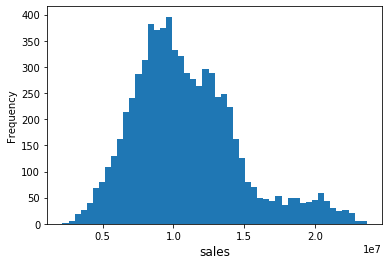

In [12]:
df['SALES_PRICE'].plot.hist(bins=50)
plt.xlabel('sales',fontsize=12)
# ->we can see the graph(target variable) is right skewed very small number of houses have high prices

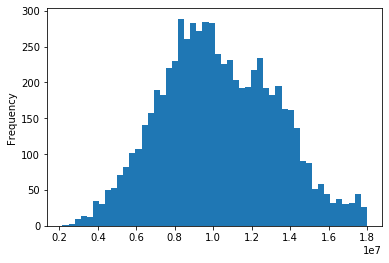

In [13]:
# -> now i wanna see only houses which has value less than 2.0 crore
# -> i removed those houses which were less than 2.0 crore because less number of houses after 2.o crore so that the histogram looks symmetric
(df['SALES_PRICE'].loc[df['SALES_PRICE']<18000000]).plot.hist(bins=50)

Text(0.5, 0, 'Area in sq feet')

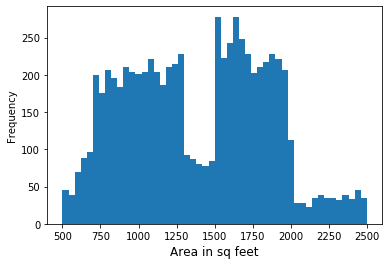

In [14]:
## Area of house in square feet

df['INT_SQFT'].plot.hist(bins=50)
plt.xlabel('Area in sq feet', fontsize=12)

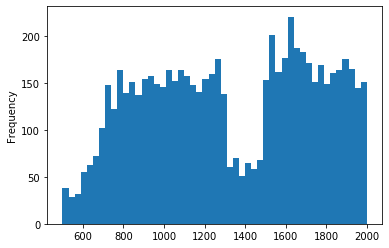

In [15]:
# ->most houses have area between 750 sq feet and 1250 sq feet or around 1500 sq feet to 2000 sq feet 
# -> very less number of houses have area more than 2000 sq feet or less than 750 sq feet
# -> so i would want to eliminate the houses above 2000 and below 750 sq feet
(df['INT_SQFT'].loc[df['INT_SQFT']<2000]).plot.hist(bins=50)

Text(0.5, 0, 'Registration fee per house')

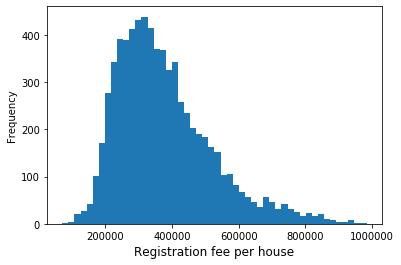

In [16]:
## Home work experiment with  more continous value
## now registration fee
df['REG_FEE'].plot.hist(bins=50)
plt.xlabel('Registration fee per house', fontsize=12)

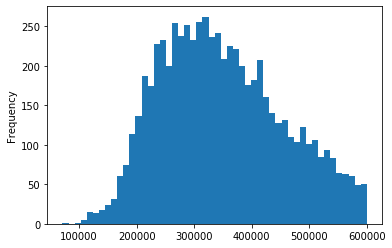

In [17]:
# -> it is massively right skewed so now we are gonna eliminate the unwanted values to make it more symmetric
(df['REG_FEE'].loc[df['REG_FEE']<600000]).plot.hist(bins=50)


##### Value Counts

In [18]:
df['N_BEDROOM'].value_counts()
# -> tells about number of bedrooms in houses

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [19]:
#if i want it in percentage 
df['N_BEDROOM'].value_counts()/len(df)*100

1.0    53.383036
2.0    33.084822
3.0     9.945140
4.0     3.572936
Name: N_BEDROOM, dtype: float64

In [20]:
# #53% 1 bedroom
# 33% 2 bedroom
# 9% 3 bedrooms
# 3.5% 4 bedrooms


In [21]:
df['N_ROOM'].value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

In [22]:
df['N_ROOM'].value_counts()/len(df)*100

4    36.052891
3    29.891687
5    17.527078
2    12.955409
6     3.572936
Name: N_ROOM, dtype: float64

In [23]:
#1 room - 36%
#2 room - 29%
#3 room - 17%
#4 room - 12%
#5 room - 3%


# Bar plot


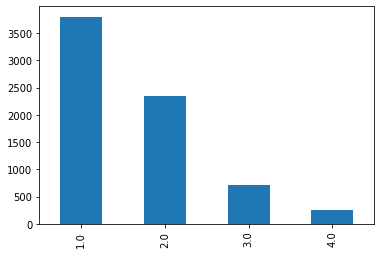

In [24]:
df['N_BEDROOM'].value_counts().plot(kind='bar')

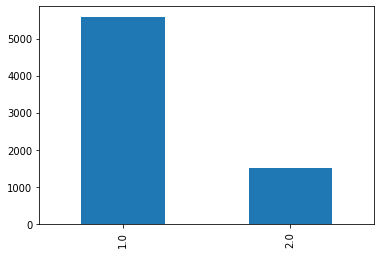

In [25]:
df['N_BATHROOM'].value_counts().plot(kind='bar')

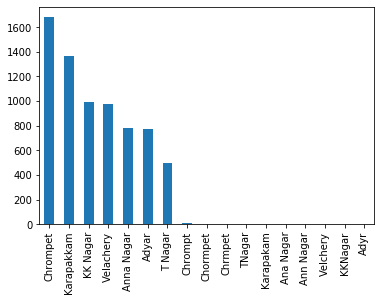

In [26]:
df['AREA'].value_counts().plot(kind='bar')

In [27]:
#-> only 7 unique area others are dublicate name


In [28]:
df['PARK_FACIL'].value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

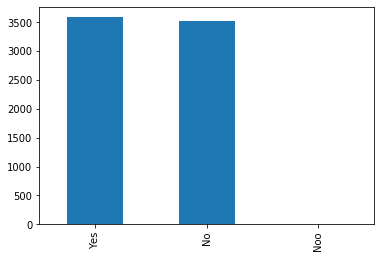

In [29]:
df['PARK_FACIL'].value_counts().plot(kind='bar') 

In [30]:
# ->here noo has spelling mistake which will be corrected during data manipulation

# Data Manipulation and Bivariate Analysis

#### DATA MANIPULATION


###### ->Drop Dublicate
###### ->Fill Missing Value
###### ->Correct the Data Types
###### ->Fix the Spelling errors in the Variables



In [31]:
df.drop_duplicates()

## -> here this funtions drops a row which has same values as another row  

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [32]:
df.drop_duplicates(subset=['AREA'])
## -> here all the same named areas are deleted though changes are not made in the real data set but if we insert inplace=True after subset it will be changed in original data set 

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
5,P00219,Chrompet,1220,11-09-2014,36,2.0,1.0,4,Partial,No,...,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320,409027,198316,12394750
22,P06851,KK Nagar,2010,06-05-2009,114,3.0,2.0,5,Partial,No,...,NoSewr,Gravel,RH,3.4,4.5,3.4,3.730,327762,262210,10925400
24,P00902,TNagar,1972,13-05-2013,111,2.0,1.0,5,AdjLand,No,...,NoSewr,No Access,RH,4.1,4.4,2.8,3.590,487297,167073,13922760
25,P00293,T Nagar,1685,19-07-2014,105,1.0,1.0,4,Family,No,...,NoSewr,Gravel,RM,2.8,4.4,4.0,3.740,352830,176415,12601080
175,P00920,Chrompt,869,01-05-2013,39,1.0,1.0,3,Family,No,...,NoSewr,No Access,RM,4.3,4.8,3.3,4.200,220661,138935,8172630
245,P00166,Chrmpet,1277,29-10-2014,111,2.0,1.0,4,AdjLand,Yes,...,AllPub,No Access,RM,4.0,3.8,3.4,3.740,518443,47131,15710400


In [33]:
df.drop_duplicates(subset=['AREA']).shape

(17, 22)

In [34]:
df.drop_duplicates().shape
##-> no duplicates

(7109, 22)

In [35]:
df.shape

(7109, 22)

#####  Missing Values

In [36]:
###### missing values 
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

###### Different ways of dealing with missing values 
 Remove the row with the missing values .
 mean or median in the case of continue missing variable
 with mode in case of categorical variable 
 using other independent variable 

In [37]:
df.dropna( axis=0,how='any')
##->it drops rows which has empty values 

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [38]:
df.dropna(axis=1,how='any')
#-> it drops column which ever missing values

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,3.0,2.2,2.4,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,4.3,4.2,2.9,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,425350,119098,8507000


In [39]:
###-> dropping rows and columns causes loss of data
 ##-> its better to immute values with mean , median mode

In [40]:
 df['N_BEDROOM'].mode()

0    1.0
dtype: float64

In [42]:
 df['N_BEDROOM'].fillna(value=(df['N_BEDROOM'].mode()[0]),inplace=True)

###### 2.N_Bathroom

In [43]:
df.loc[df['N_BATHROOM'].isnull()==True]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
70,P05304,Anna Nagar,1589,22-03-2010,39,1.0,NaN,4,Partial,No,...,AllPub,Gravel,RL,2.1,2.5,4.5,3.16,451857,85486,12212350
5087,P01333,Chrompet,1016,02-08-2012,105,1.0,NaN,3,AbNormal,Yes,...,NoSewr,Gravel,RM,3.2,4.2,2.0,3.24,330086,106479,10647920
6134,P01332,Chormpet,916,02-08-2012,173,1.0,NaN,3,Normal Sale,Yes,...,ELO,Paved,RL,3.4,3.5,3.0,NaN,265423,44237,8847420
6371,P01189,Chrompet,1035,06-11-2012,90,1.0,NaN,3,Partial,No,...,NoSeWa,No Access,RM,2.3,3.5,3.2,3.05,223403,24823,8274200
6535,P09189,Anna Nagar,1864,05-03-2007,184,2.0,NaN,5,Family,Yes,...,NoSewr,Paved,RM,3.3,3.7,4.7,3.96,575606,124455,15556920


In [57]:
for i in range(0,len(df)):
    if pd.isnull(df['N_BEDROOM'][i])==True:
        if (df['N_BEDROOM'][i]==1.0):
            df['N_BATHROOM'][i]=1.0
    else:
            df['N_BATHROOM'][i]=2.0
    

C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


##### QS_OVERALL

In [58]:
df[['QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL']].head()

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL
0,4.0,3.9,4.9,4.330
1,4.9,4.2,2.5,3.765
2,4.1,3.8,2.2,3.090
3,4.7,3.9,3.6,4.010
4,3.0,2.5,4.1,3.290


In [59]:
temp=(df['QS_ROOMS']+df['QS_BATHROOM']+df['QS_BEDROOM'])/3
pd.concat([df['QS_ROOMS'],df['QS_BATHROOM'],df['QS_BEDROOM'],temp],axis=1).head(10)

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,0
0,4.0,3.9,4.9,4.266667
1,4.9,4.2,2.5,3.866667
2,4.1,3.8,2.2,3.366667
3,4.7,3.9,3.6,4.066667
4,3.0,2.5,4.1,3.200000
5,4.5,2.6,3.1,3.400000
6,3.6,2.1,2.5,2.733333
7,2.4,4.5,2.1,3.000000
8,2.9,3.7,4.0,3.533333
9,3.1,3.1,3.3,3.166667


In [60]:
## -> imputing missing values with the help of other 'quality score' columns
## -> Additionally we can assign higher weights to n_bedroom and lower to n_bathroom 

In [61]:
df.loc[df['QS_OVERALL'].isnull()==True].head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE


In [62]:
df.loc[df['QS_OVERALL'].isnull()==True].shape

(0, 22)

In [63]:
def fill_na(x):
    return ((x['QS_ROOMS']+x['QS_BATHROOM']+x['QS_BEDROOM'])/3)

In [64]:
df['QS_OVERALL'] = df.apply(lambda x: fill_na(x) if pd.isnull(x['QS_OVERALL']) else x['QS_OVERALL'],axis=1)

In [65]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

##### DATA TYPES

In [56]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [66]:
df=df.astype({'N_BEDROOM':'object','N_ROOM':'object','N_BATHROOM':'object'})

#### Replace Categories

In [72]:
temp=['N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE','AREA']
for i in temp:
    print('****************value count in',i,'*****************')
    print(df[i].value_counts())
    print('')

****************value count in N_BEDROOM *****************
1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

****************value count in N_BATHROOM *****************
2.0    7109
Name: N_BATHROOM, dtype: int64

****************value count in N_ROOM *****************
4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

****************value count in SALE_COND *****************
AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

****************value count in PARK_FACIL *****************
Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

****************value count in BUILDTYPE *****************
House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

****************value count in UTILITY_AVAIL ********

#### -> AREA
#### ->SALE_COND
#### ->PARK_FACIL
#### ->BUILD TYPE
#### ->UTILITY_AVAIL
#### ->STREET

In [73]:
#update the upper list

In [74]:
df['PARK_FACIL'].replace({'Noo':'No'},inplace=True)
df['PARK_FACIL'].value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [76]:
df['AREA'].replace({'Chrompt':'Chrompet','Chrmpet':'Chrompet','Chormpet':'Chrompet','Karapakam':'Karapakkam','KKNagar':'KK Nagar','Velchery':'Velachery','Ana Nagar':'Anna Nagar','Ann Nagar':'Anna Nagar','Adyr':'Adyar','TNagar':'T Nagar'},inplace=True)
df['AREA'].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [80]:
df['SALE_COND'].replace({'Adj Land':'AdjLand','Ab Normal':'AbNormal','Partiall':'Partial','PartiaLl':'Partial'}, inplace=True)
df['SALE_COND'].value_counts()

AdjLand        1439
Partial        1429
Normal Sale    1423
AbNormal       1411
Family         1403
partial           4
Name: SALE_COND, dtype: int64

##perform remaining corrections

### BIVARIATE ANALYSIS